## Setup Notebook
- Julia Env
- Attach User Libraries

In [1]:
using Pkg
project_root = dirname(dirname(@__DIR__))
Pkg.activate(project_root)     
Pkg.instantiate()     

  Activating project at `c:\Users\User\Documents\repos\TESI\tesi_data\progetto_s_on_f.md\b_spline\functional-data-regression-mip`


In [2]:

using RCall
user_library_path = "C:/Users/User/AppData/Local/R/cache/R/renv/library/functional-data-regression-mip-e3349204/R-4.3/x86_64-w64-mingw32"
@rput user_library_path
R"""
    .libPaths(c(user_library_path,
    .libPaths()))
"""
    

RObject{StrSxp}
[1] "C:/Users/User/AppData/Local/R/cache/R/renv/library/functional-data-regression-mip-e3349204/R-4.3/x86_64-w64-mingw32"
[2] "C:/Users/User/AppData/Local/R/win-library/4.3"                                                                      
[3] "C:/Program Files/R/R-4.3.1/library"                                                                                 


In [3]:

file_mgmt_file_path = joinpath(project_root, "src", "Julia","utils", "file_management.jl")
include(file_mgmt_file_path)



read_model_results

In [18]:
simulation_name = "5_predictors"
model = "l0_and_limit"
simulation_conf = "2500_500_6_250_0.01_0.001_1000_0.01_1"
has_time_domain = true
simulation_path =   joinpath(project_root, "outputs", "runs", simulation_name, model, simulation_conf, "model_results" * ".txt")
model_params_path = joinpath(project_root, "outputs", "runs", simulation_name, model, simulation_conf, "model_params" * ".csv")


"c:\\Users\\User\\Documents\\repos\\TESI\\tesi_data\\progetto_s_on_f.md\\b_spline\\functional-data-regression-mip\\outputs\\runs\\5_predictors\\l0_and_limit\\2500_500_6_250_0.01_0.001_1000_0.01_1\\model_params.csv"

In [19]:
using CSV
using DataFrames

results = read_model_results(simulation_path);
# read mode_params.csv in Julia from "model_params_path"
df =CSV.read(model_params_path, DataFrame) 




Row,SimulationName,Directory,SettingName,ModelName,Observations,Predictors,BasisFunctions,Measurements,Lambda,LambdaGroup,M,ErrorSD,Seed
,String15,String,String15,String15,Int64,Float64,Int64,Int64,Float64,Float64,Int64,Float64,Int64
1,5_predictors,2500_500_6_250_0.01_0.001_1000_0.01_1,settings,l0_and_limit,2500,5.0,6,250,0.01,0.001,1000,0.01,1


In [20]:
results

Dict{Any, Any} with 6 entries:
  "Beta Matrix"          => [1.47142 1.71732 … 3.33453 3.99974; -0.0090447 0.37…
  "True Predictors"      => [1.0; 1.0; … ; 0.0; 1.0;;]
  "Evaluated Predictors" => [1.0; 1.0; … ; 0.0; 1.0;;]
  "True Intercept"       => [0.0;;]
  "Evaluated Intercept"  => [0.0;;]
  "Beta Star"            => [1.46223 1.71581 … 3.33528 3.99932; 0.0 0.374584 … …

## Load Setting Data

In [21]:
simulation_settings_file = df.SettingName[1]


"settings"

In [22]:
load_conf_file_path = joinpath(project_root, "src", "R","generic_simulator","utils", "loader_utilities.R")



@rput simulation_name
@rput simulation_settings_file
@rput load_conf_file_path
R"""
source(load_conf_file_path)
library(here)

# Retrieve time_domains from the param setting
inputs  <- load_simulation_settings(simulation_name, simulation_settings_file)

# Recreate the basis values 
source(here("src", "R",   "generic_simulator",  "utils" , "basis_utilities.R")) 

basis_objs <- create_basis(inputs$basis_functions, inputs$time_domains, inputs$norder, inputs$predictors)
result <- smooth_betas_generic(beta_funcs,basis_functions, time_domains, basis_objs)
basis_values <- result$basis_values

"""



RObject{RealSxp}
, , 1

     [,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     [,8]
[1,]    1 0.9880241 0.9761442 0.9643599 0.9526708 0.9410765 0.9295767 0.918171
[2,]    1 0.9880241 0.9761442 0.9643599 0.9526708 0.9410765 0.9295767 0.918171
[3,]    1 0.9880241 0.9761442 0.9643599 0.9526708 0.9410765 0.9295767 0.918171
[4,]    1 0.9880241 0.9761442 0.9643599 0.9526708 0.9410765 0.9295767 0.918171
[5,]    1 0.9880241 0.9761442 0.9643599 0.9526708 0.9410765 0.9295767 0.918171
         [,9]     [,10]     [,11]     [,12]     [,13]     [,14]     [,15]
[1,] 0.906859 0.8956402 0.8845144 0.8734811 0.8625399 0.8516905 0.8409324
[2,] 0.906859 0.8956402 0.8845144 0.8734811 0.8625399 0.8516905 0.8409324
[3,] 0.906859 0.8956402 0.8845144 0.8734811 0.8625399 0.8516905 0.8409324
[4,] 0.906859 0.8956402 0.8845144 0.8734811 0.8625399 0.8516905 0.8409324
[5,] 0.906859 0.8956402 0.8845144 0.8734811 0.8625399 0.8516905 0.8409324
         [,16]     [,17]     [,18]    [,19]    [,20]    [,

In [23]:
# Sample input data
time_domains = rcopy(R"(time_domains)");

# betas and basis
basis_values = rcopy(R"(basis_values)");

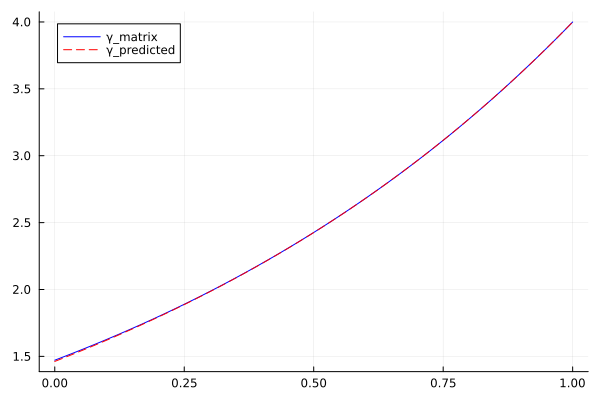

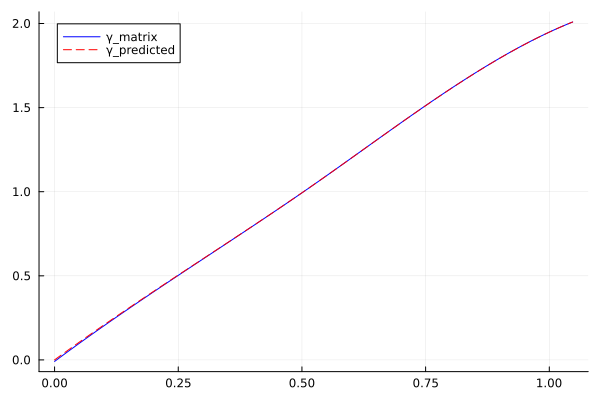

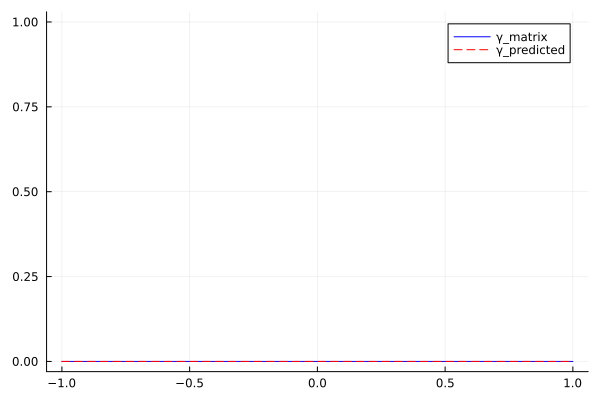

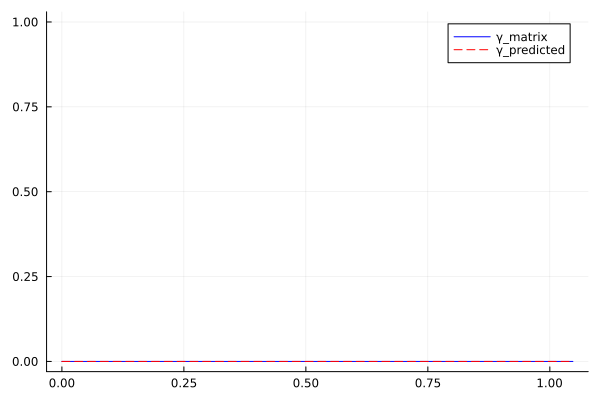

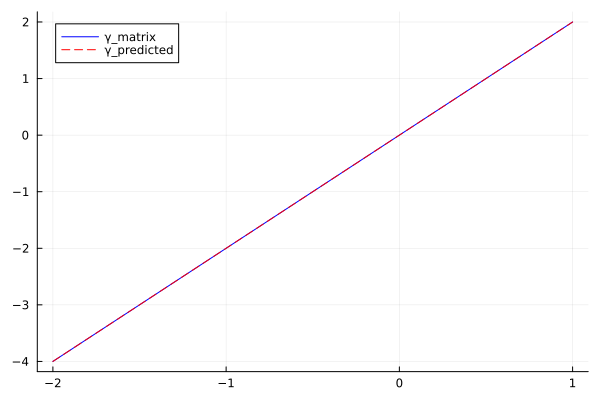

In [24]:
plot_file_path = joinpath(project_root, "src", "Julia","utils", "plot.jl")
include(plot_file_path)


output_folder= joinpath(project_root, "outputs", "plots", simulation_name, model, simulation_settings_file,simulation_conf)
γ_matrix = results["Beta Matrix"]
γ_star = results["Beta Star"]
plot_combined_predicted_curve(γ_matrix, γ_star, basis_values,  time_domains, output_folder, true)
